In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
data = pd.read_csv('/content/Wine_clust .csv')

In [148]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [150]:
data.shape

(178, 13)

In [151]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Checking for null values

In [152]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

View the distribution of data using histogram

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic_Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Ash_Alcanity'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_Phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_Intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280'}>],
       [<Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

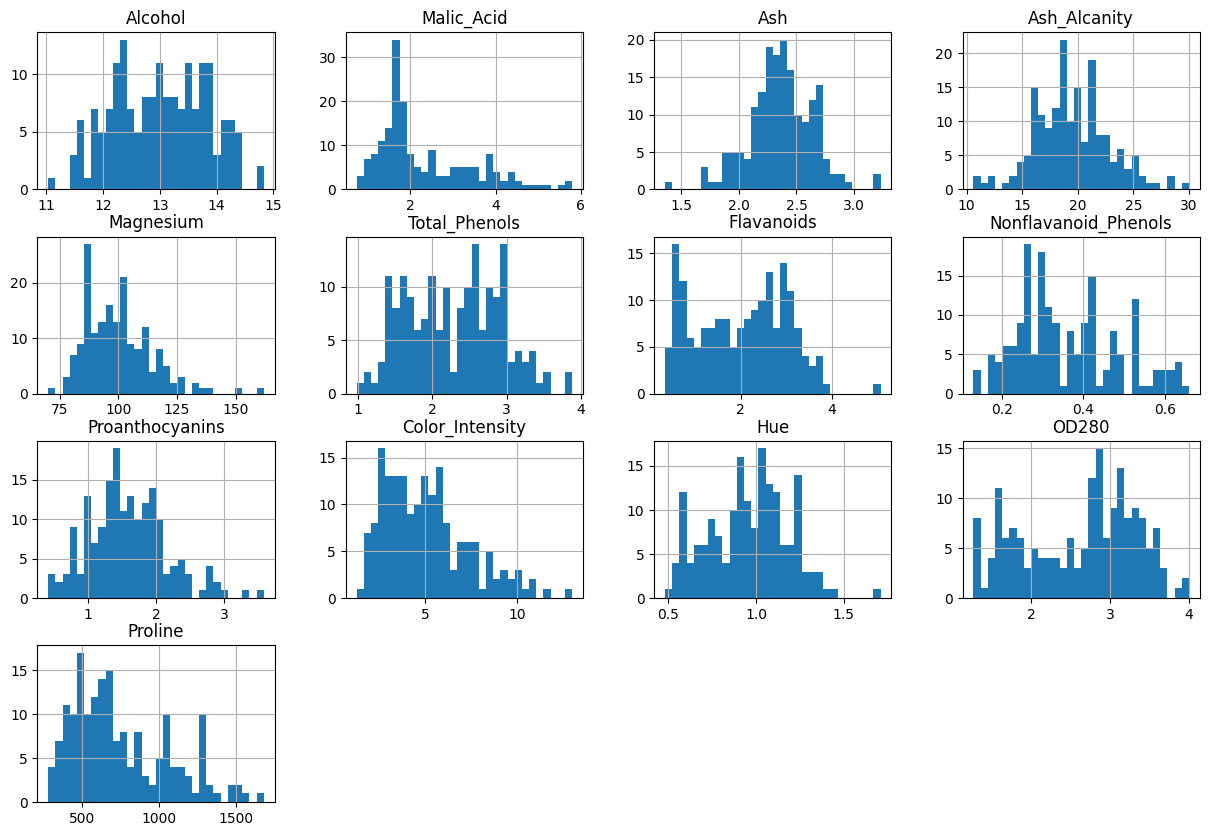

In [153]:
data.hist(bins=30, figsize=(15, 10))


<Axes: >

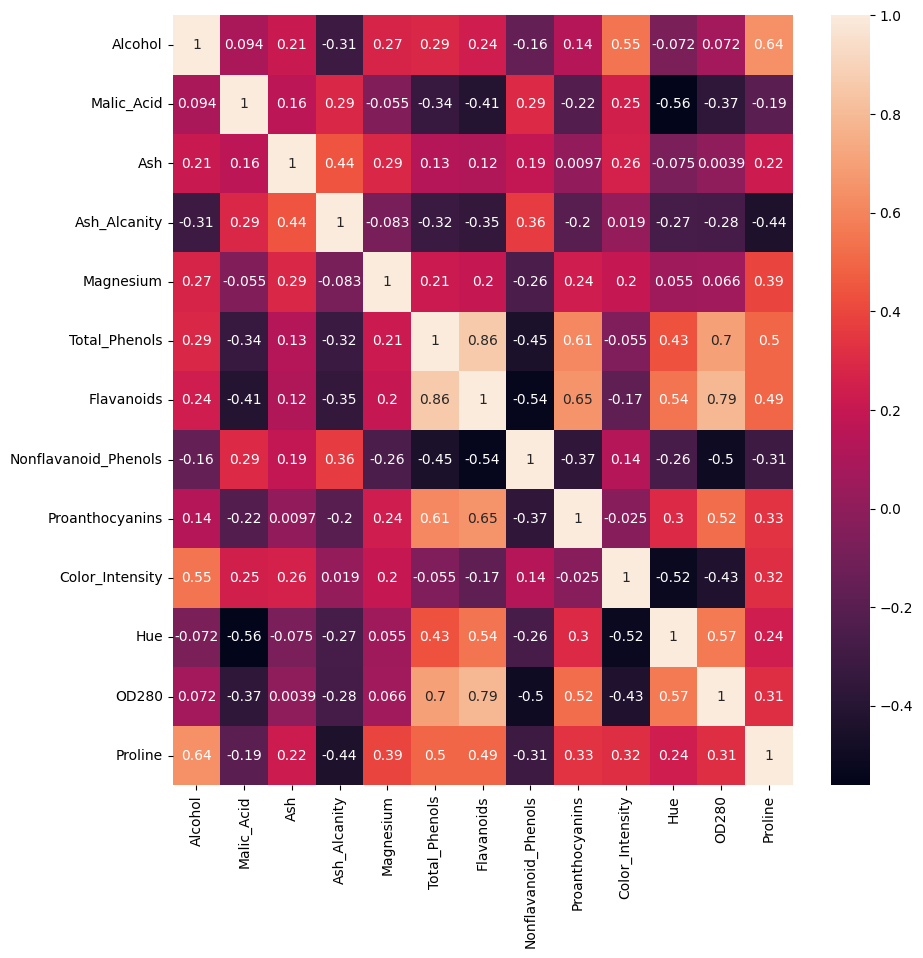

In [154]:
#checking corelation

corr_matrix = data.corr(numeric_only = True)
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

**Normalise the dataset**

In [155]:

from sklearn.preprocessing import normalize
features_scaled = normalize(data)
features_scaled = pd.DataFrame(features_scaled, columns=data.columns)
features_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


**K Means clustering**

In [156]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state = 0,n_init=10)
  kmeans.fit(features_scaled)
  labels = kmeans.inertia_
  print('Cluster = ',i,'wcss value =',labels)
  wcss.append(labels)

Cluster =  1 wcss value = 0.5893776280459065
Cluster =  2 wcss value = 0.21097561296654627
Cluster =  3 wcss value = 0.10306150549665624
Cluster =  4 wcss value = 0.05910073413010722
Cluster =  5 wcss value = 0.039673405008976786
Cluster =  6 wcss value = 0.031229113729223226
Cluster =  7 wcss value = 0.02672095236299138
Cluster =  8 wcss value = 0.02327124515332484
Cluster =  9 wcss value = 0.020490230374036862
Cluster =  10 wcss value = 0.018583016461616902


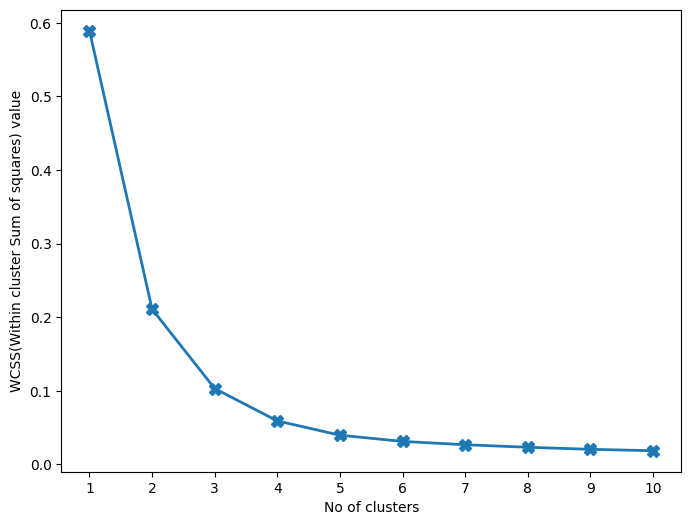

In [157]:
#displaying the value of WCSS as an Elbow
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,linewidth=2,markersize=8,marker='X')
plt.xlabel('No of clusters')
plt.ylabel('WCSS(Within cluster Sum of squares) value')
plt.xticks(np.arange(1,11,1))
plt.show()


In [158]:
#taking number of clusters as 3
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state = 0,n_init=15)
cluster_labels = kmeans.fit_predict(features_scaled)
cluster_labels

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

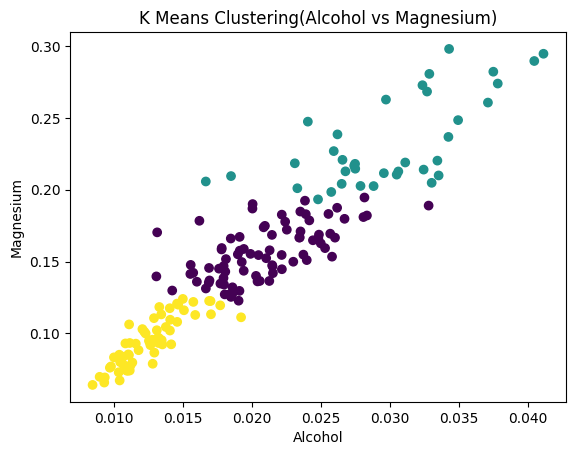

In [159]:
plt.scatter(features_scaled['Alcohol'],features_scaled['Magnesium'],c=cluster_labels)
plt.title('K Means Clustering(Alcohol vs Magnesium)')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.show()

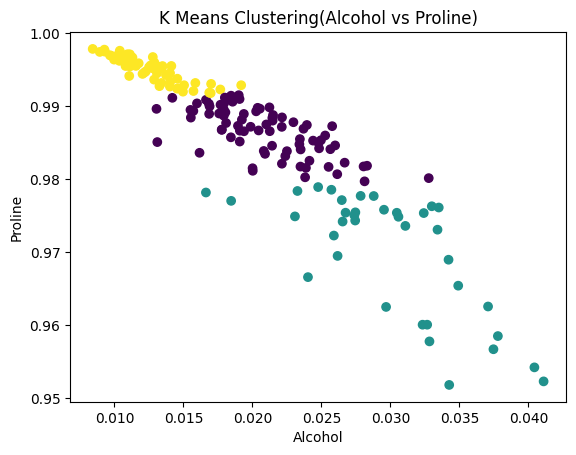

In [160]:
plt.scatter(features_scaled['Alcohol'],features_scaled['Proline'],c=cluster_labels)
plt.title('K Means Clustering(Alcohol vs Proline)')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.show()

**Aggloromerative Clustering**

In [161]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

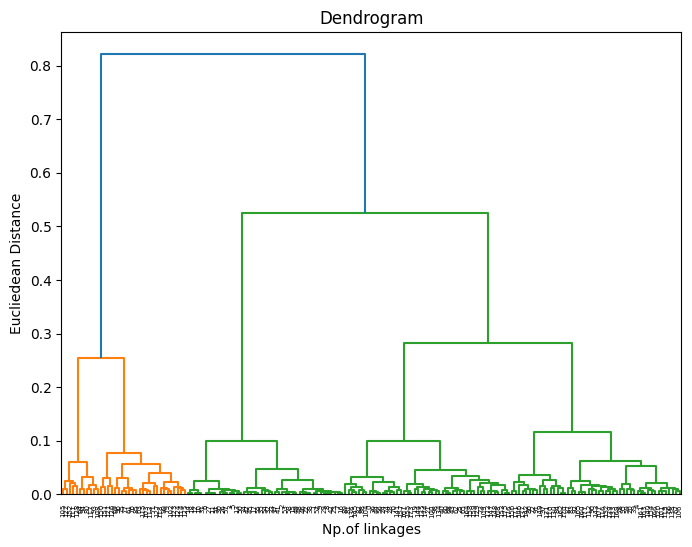

In [162]:
Z=linkage(features_scaled,method='ward',metric='euclidean')
plt.figure(figsize=(8,6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Np.of linkages')
plt.ylabel('Eucliedean Distance')
plt.show()

In [163]:
#selecting number of clusters as 3
ahc = AgglomerativeClustering(n_clusters=3,linkage='ward',metric='euclidean')
y_ahc = ahc.fit_predict(features_scaled)
y_ahc

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])


Silhoutte Score

In [164]:
print('Silhoutte Score  = ',silhouette_score(features_scaled,y_ahc))

Silhoutte Score  =  0.503557539176131


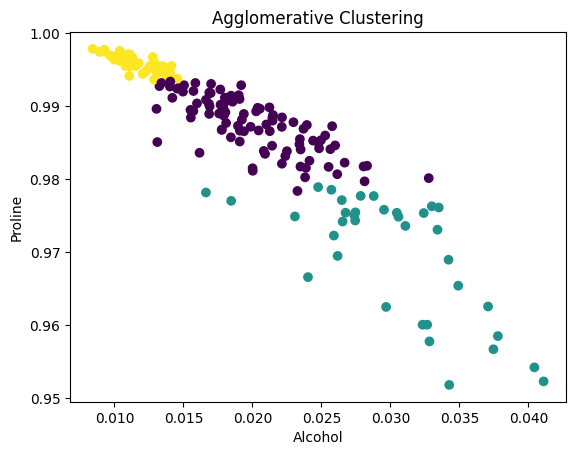

In [179]:
#plt.figure(figsize=(10, 7))
plt.scatter(features_scaled['Alcohol'], features_scaled['Proline'], c=ahc.labels_)
plt.title('Agglomerative Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.show()

**DBSCAN clustering**

In [167]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
data_scaled = sscaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


finding the nearest Neighbours to find min_samples

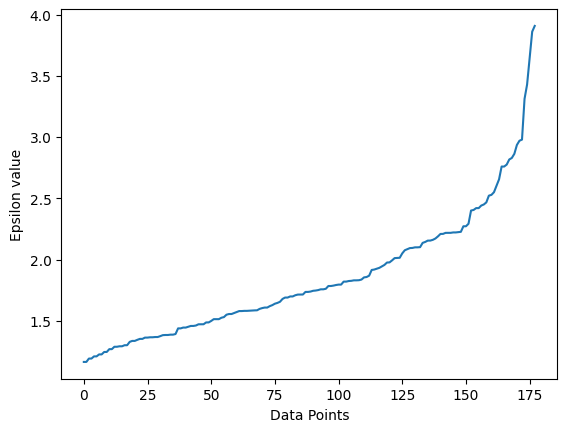

In [168]:
#finding the nearest Neighbours to find min_samples
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=26)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Data Points')
plt.ylabel('Epsilon value')
plt.plot(distances)


taking the epsilon value as 3.0 and minimum samples as 2 * Dimension

In [169]:
#DBSCAN clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3,min_samples = 26)
model = dbscan.fit(data_scaled)
labels = dbscan.labels_

In [170]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0,
       -1, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [171]:
# to find the number of Clusters
sample_cores = np.zeros_like(labels,dtype=bool)
sample_cores[dbscan.core_sample_indices_]==True
n_clusters = len(set(labels))-(1 if -1 in labels else 0)
print("Number of Clusters",n_clusters)

Number of Clusters 2


In [172]:
# Noise points
n_noise = list(labels).count(-1)
print("Number of Noise Points",n_noise)

Number of Noise Points 20


In [177]:
# Silhoutte Score
print('Silhoutte Score :',silhouette_score(data_scaled,dbscan.labels_))

Silhoutte Score : 0.22490883609486223


In [173]:
#Copy the scaled data to another dataset and add another column 'Cluster'
DBSCAN_dataset = data_scaled.copy()
DBSCAN_dataset.loc[:,'Cluster'] = dbscan.labels_
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]
#  Number of Elements in each cluster.
DBSCAN_dataset.Cluster.value_counts().to_frame()


,Cluster
0,112
1,46
-1,20


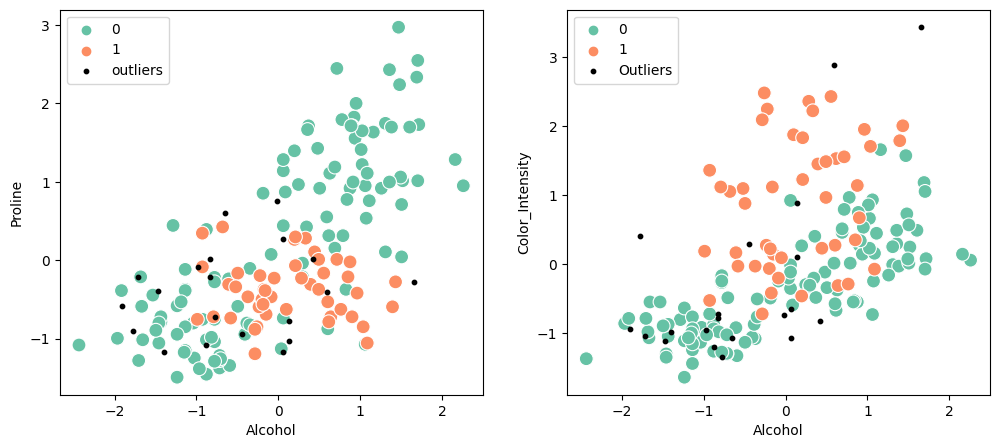

In [176]:
#Ploting the Clusters gor by DBSCAN
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]
dp=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data=dp,x='Alcohol', y='Proline', ax=axes[0], hue='Cluster',palette='Set2', legend='full',s=100)

sns.scatterplot(data=dp,x='Alcohol', y='Color_Intensity',hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=100)

axes[0].scatter(outliers['Alcohol'], outliers['Proline'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Alcohol'], outliers['Color_Intensity'], s=10, label='Outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.show()